In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / exp_z.sum(axis=1, keepdims=True)



In [3]:
def initialize_parameters(layers):
    np.random.seed(1)
    weights = [np.random.randn(layers[i], layers[i+1]) * 0.01 for i in range(len(layers) - 1)]
    biases = [np.zeros((1, layers[i+1])) for i in range(len(layers) - 1)]
    return weights, biases


In [4]:
def forward_propagation(X, weights, biases):
    A = [X]
    Z = []
    for i in range(len(weights)):
        Z.append(np.dot(A[-1], weights[i]) + biases[i])
        if i == len(weights) - 1:
            A.append(softmax(Z[-1]))
        else:
            A.append(sigmoid(Z[-1]))
    return Z, A


In [5]:
def backward_propagation(X, Y, weights, biases, Z, A, learning_rate=0.01):
    m = Y.shape[0]
    dZ = A[-1] - Y
    for i in reversed(range(len(weights))):
        dW = np.dot(A[i].T, dZ) / m
        db = np.sum(dZ, axis=0, keepdims=True) / m
        if i > 0:
            dZ = np.dot(dZ, weights[i].T) * sigmoid_derivative(A[i])
        weights[i] -= learning_rate * dW
        biases[i] -= learning_rate * db


In [6]:
def compute_loss(Y, Y_hat):
    m = Y.shape[0]
    loss = -np.sum(Y * np.log(Y_hat)) / m
    return loss


In [7]:
def compute_accuracy(X, Y, weights, biases):
    _, A = forward_propagation(X, weights, biases)
    predictions = np.argmax(A[-1], axis=1)
    accuracy = np.mean(predictions == np.argmax(Y, axis=1))
    return accuracy


In [8]:
def train_neural_network(X_train, Y_train, X_val, Y_val, layers, epochs=1000, learning_rate=0.01):
    weights, biases = initialize_parameters(layers)
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(epochs):
        Z_train, A_train = forward_propagation(X_train, weights, biases)
        Z_val, A_val = forward_propagation(X_val, weights, biases)
        backward_propagation(X_train, Y_train, weights, biases, Z_train, A_train, learning_rate)

        train_loss = compute_loss(Y_train, A_train[-1])
        val_loss = compute_loss(Y_val, A_val[-1])
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        train_accuracy = compute_accuracy(X_train, Y_train, weights, biases)
        val_accuracy = compute_accuracy(X_val, Y_val, weights, biases)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Training Loss {train_loss}, Validation Loss {val_loss}, Training Accuracy {train_accuracy}, Validation Accuracy {val_accuracy}')

    return weights, biases, train_losses, val_losses, train_accuracies, val_accuracies


In [18]:
def split_data(X, Y, train_size=0.6, val_size=0.2, test_size=0.2):
    assert train_size + val_size + test_size == 1
    num_samples = X.shape[0]
    indices = np.random.permutation(num_samples)

    train_end = int(train_size * num_samples)
    val_end = train_end + int(val_size * num_samples)

    X_train, Y_train = X[indices[:train_end]], Y[indices[:train_end]]
    X_val, Y_val = X[indices[train_end:val_end]], Y[indices[train_end:val_end]]
    X_test, Y_test = X[indices[val_end:]], Y[indices[val_end:]]

    return X_train, X_val, X_test, Y_train, Y_val, Y_test


In [11]:
# Load the MNIST dataset
file_path = "/content/MNIST_Subset.h5"
with h5py.File(file_path, 'r') as h5file:
    X = np.array(h5file['X'])
    y = np.array(h5file['Y'])

# Reshape and normalize
X = X.reshape(X.shape[0], -1)
X = X / 255.0
Y = np.eye(10)[y.astype(int)]

# Split data
X_train, X_val, X_test, Y_train, Y_val, Y_test = split_data(X, Y)

In [12]:
# 1 hidden layer with 100 units
layers_1 = [784, 100, 10]
weights_1, biases_1, train_losses_1, val_losses_1, train_accuracies_1, val_accuracies_1 = train_neural_network(X_train, Y_train, X_val, Y_val, layers_1)

Epoch 0: Training Loss 2.3492986098355084, Validation Loss 2.3493408026237583, Training Accuracy 0.5102923976608187, Validation Accuracy 0.5094736842105263
Epoch 100: Training Loss 0.7607478170643315, Validation Loss 0.7607885386115639, Training Accuracy 0.5102923976608187, Validation Accuracy 0.5094736842105263
Epoch 200: Training Loss 0.72064057296992, Validation Loss 0.7206891261450428, Training Accuracy 0.5102923976608187, Validation Accuracy 0.5094736842105263
Epoch 300: Training Loss 0.707238957367916, Validation Loss 0.7073042121930652, Training Accuracy 0.5102923976608187, Validation Accuracy 0.5094736842105263
Epoch 400: Training Loss 0.6985960154878098, Validation Loss 0.6986868552078307, Training Accuracy 0.5242105263157895, Validation Accuracy 0.5235087719298246
Epoch 500: Training Loss 0.6900861505207205, Validation Loss 0.6902159574068089, Training Accuracy 0.6624561403508772, Validation Accuracy 0.6585964912280702
Epoch 600: Training Loss 0.6792418368247762, Validation L

In [13]:
# 3 hidden layers with 100, 50, 50 units
layers_2 = [784, 100, 50, 50, 10]
weights_2, biases_2, train_losses_2, val_losses_2, train_accuracies_2, val_accuracies_2 = train_neural_network(X_train, Y_train, X_val, Y_val, layers_2)

Epoch 0: Training Loss 2.311746721677343, Validation Loss 2.3117594096322365, Training Accuracy 0.5102923976608187, Validation Accuracy 0.5094736842105263
Epoch 100: Training Loss 0.8437863623304643, Validation Loss 0.8438279296441551, Training Accuracy 0.5102923976608187, Validation Accuracy 0.5094736842105263
Epoch 200: Training Loss 0.7565444043375084, Validation Loss 0.7565806855084408, Training Accuracy 0.5102923976608187, Validation Accuracy 0.5094736842105263
Epoch 300: Training Loss 0.7318216123265396, Validation Loss 0.7318568139159173, Training Accuracy 0.5102923976608187, Validation Accuracy 0.5094736842105263
Epoch 400: Training Loss 0.7205474992242807, Validation Loss 0.7205822472588386, Training Accuracy 0.5102923976608187, Validation Accuracy 0.5094736842105263
Epoch 500: Training Loss 0.7141816438938766, Validation Loss 0.7142161444268555, Training Accuracy 0.5102923976608187, Validation Accuracy 0.5094736842105263
Epoch 600: Training Loss 0.7101209740845861, Validation

In [14]:
# Save the models after training
def save_model(weights, biases, filename):
    np.savez(filename, **{'weights_' + str(i): w for i, w in enumerate(weights)},
                     **{'biases_' + str(i): b for i, b in enumerate(biases)})

save_model(weights_1, biases_1, 'best_model_1.npz')
save_model(weights_2, biases_2, 'best_model_2.npz')


In [15]:
# Evaluate on test set
accuracy_1 = compute_accuracy(X_test, Y_test, weights_1, biases_1)
accuracy_2 = compute_accuracy(X_test, Y_test, weights_2, biases_2)

print(f'Accuracy with 1 hidden layer: {accuracy_1}')
print(f'Accuracy with 3 hidden layers: {accuracy_2}')


Accuracy with 1 hidden layer: 0.9116099614170466
Accuracy with 3 hidden layers: 0.5184145913714486


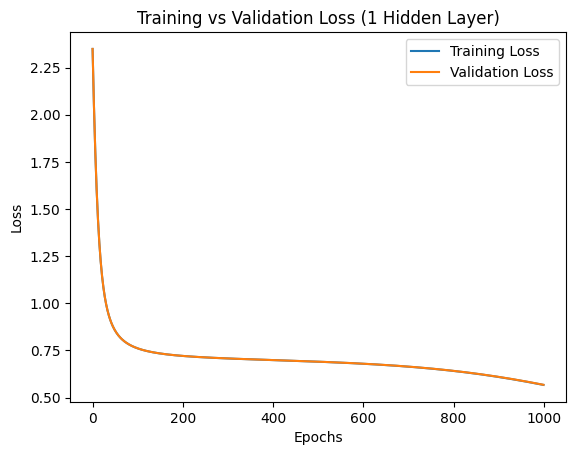

In [16]:
# Plot training and validation loss for model with 1 hidden layer
plt.plot(train_losses_1, label='Training Loss')
plt.plot(val_losses_1, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss (1 Hidden Layer)')
plt.legend()
plt.show()

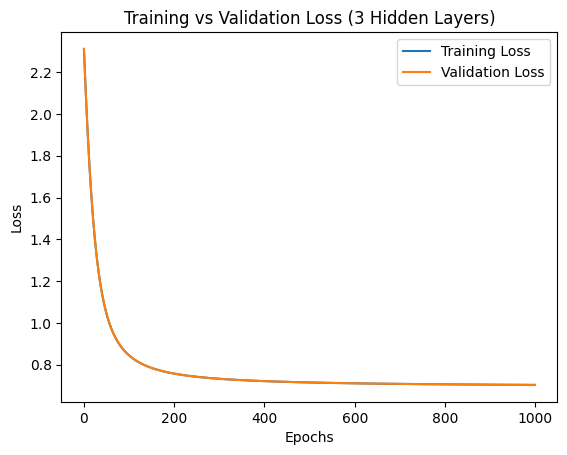

In [17]:
# Plot training and validation loss for model with 3 hidden layers
plt.plot(train_losses_2, label='Training Loss')
plt.plot(val_losses_2, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss (3 Hidden Layers)')
plt.legend()
plt.show()
